In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.utils import np_utils

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [2]:
image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)    

train_dataset = image_generator.flow_from_directory(batch_size=10,
                                                 directory='/content/drive/MyDrive/Vietnamdishes',
                                                 shuffle=True,
                                                 target_size=(150, 150), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=10,
                                                 directory='/content/drive/MyDrive/Vietnamdishes',
                                                 shuffle=True,
                                                 target_size=(150, 150), 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 160 images belonging to 10 classes.
Found 40 images belonging to 10 classes.


In [3]:
train_dataset.classes
train_dataset.class_indices

{'Banh mi': 0,
 'Banh phong tom': 1,
 'Banh trang tron': 2,
 'Bo ne': 3,
 'Bun bo': 4,
 'Bun dau mam tom': 5,
 'Com tam': 6,
 'Ga ran': 7,
 'Mi xao bo': 8,
 'Pho': 9}

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from keras.layers import Dense,Activation,Dropout,BatchNormalization,LSTM 
from keras.models import Sequential 
from tensorflow.keras.utils import to_categorical
from keras import callbacks 
from sklearn .metrics import  precision_score,recall_score, confusion_matrix, classification_report, accuracy_score,f1_score

In [6]:
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same')) 
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))

In [7]:
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Activation, Flatten

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [8]:
from tensorflow.keras.optimizers import SGD
opt = SGD(learning_rate = 0.001, momentum = 0.9)
model.compile(optimizer = opt, loss ='categorical_crossentropy', metrics = ['accuracy'])

In [9]:
history=model.fit(train_dataset,batch_size=32,epochs=150,verbose=1,validation_data=validation_dataset)

Epoch 1/150
16/16 [==============================] - 116s 7s/step - loss: 2.5802 - accuracy: 0.0750 - val_loss: 2.3464 - val_accuracy: 0.1000
Epoch 2/150
16/16 [==============================] - 1s 44ms/step - loss: 2.3146 - accuracy: 0.1000 - val_loss: 2.3068 - val_accuracy: 0.0750
Epoch 3/150
16/16 [==============================] - 1s 46ms/step - loss: 2.2893 - accuracy: 0.1312 - val_loss: 2.2869 - val_accuracy: 0.2000
Epoch 4/150
16/16 [==============================] - 1s 44ms/step - loss: 2.2519 - accuracy: 0.2188 - val_loss: 2.2670 - val_accuracy: 0.1500
Epoch 5/150
16/16 [==============================] - 1s 45ms/step - loss: 2.2196 - accuracy: 0.1500 - val_loss: 2.2379 - val_accuracy: 0.2500
Epoch 6/150
16/16 [==============================] - 1s 47ms/step - loss: 2.1467 - accuracy: 0.2313 - val_loss: 2.1578 - val_accuracy: 0.2750
Epoch 7/150
16/16 [==============================] - 1s 45ms/step - loss: 2.1058 - accuracy: 0.2438 - val_loss: 2.1932 - val_accuracy: 0.1500
Epoch 

In [10]:
model.save('Vietnamdishes.h5')

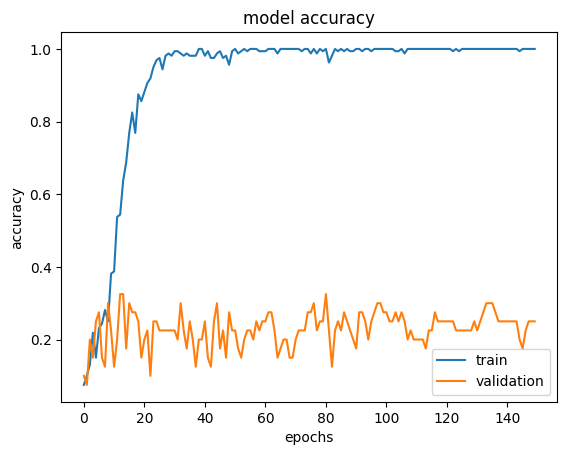

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','validation'])
plt.show()

In [14]:
score = model.evaluate(validation_dataset,verbose=0)
print('Sai số : ',score[0])
print('Độ chính xác ',score[1])

Sai số :  8.178011894226074
Độ chính xác  0.25


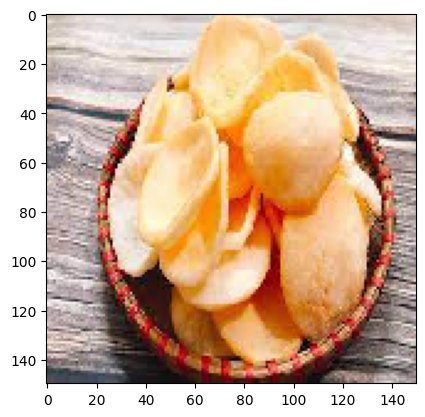

1/1 [==============================] - 0s 32ms/step
Bánh phồng tôm


In [20]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = '/content/drive/MyDrive/TestVNdishes/Banh phong tom/banh phong tom 1.jpg'

img = load_img(filename,target_size=(150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq=np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("Bánh mì")
if(kq==1):
    print("Bánh phồng tôm")
if(kq==2):
    print("Bánh tráng trộn")
if(kq==3):
    print("Bò né")
if(kq==4):
    print("Bún bò")
if(kq==5):
    print("Bún đậu mắm tôm")
if(kq==6):
    print("Cơm tấm")
if(kq==7):
    print("Gà rán")
if(kq==8):
    print("Mì xào bò")
if(kq==9):
    print("Phở")